Expected Output:

By the end of this mini project, you will need to deliver within your code:
The count of the tuples in the given dataset.
The count of the names of unique tournament names from the attributes.
The count of matches in 2018 from the attributes.
The count of wins, losses, or draws given in the data columns.
An output plot of the pie chart of the wins, losses, or draws.
An output plot of the pie chart of the neutral column in the input dataset.
The count of the names of unique team names from the attributes.

In [1]:
import pandas as pd

file_path = 'C:/Users/ktang28/ML_Mini_Project_Football/results.csv'
df = pd.read_csv(file_path)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [2]:
len(df)

42650

In [4]:
len(df.tournament.unique())

120

In [6]:
df['Year'] = pd.to_datetime(df['date']).dt.year
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
...,...,...,...,...,...,...,...,...,...,...
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False,2021
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False,2021
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False,2021
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,2021


In [8]:
df[df.Year == 2018]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
39574,2018-01-02,Iraq,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,2018
39575,2018-01-02,Oman,Bahrain,1,0,Gulf Cup,Kuwait City,Kuwait,True,2018
39576,2018-01-05,Oman,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,2018
39577,2018-01-07,Estonia,Sweden,1,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
39578,2018-01-11,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
...,...,...,...,...,...,...,...,...,...,...
40477,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40478,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40479,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40480,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018


In [9]:
# Calculate how many times the home team won, lost, or had a draw.

df['Outcome'] = df.apply(lambda row: 'Win' if row['home_score'] > row['away_score']
                         else ('Loss' if row['home_score'] < row['away_score'] else 'Draw'), axis=1)



In [14]:
home_team_results = df.groupby('home_team')['Outcome'].value_counts().unstack(fill_value=0)
print(home_team_results)
print(home_team_results.Win)


Outcome        Draw  Loss  Win
home_team                     
Abkhazia          7     2    9
Afghanistan       8    16   17
Albania          42    73   67
Alderney          0     7    0
Algeria          72    59  166
...             ...   ...  ...
Yugoslavia       37    45  108
Zambia           88    52  168
Zanzibar         10    31   17
Zimbabwe         54    39  100
Åland Islands     4     9   14

[308 rows x 3 columns]
home_team
Abkhazia           9
Afghanistan       17
Albania           67
Alderney           0
Algeria          166
                ... 
Yugoslavia       108
Zambia           168
Zanzibar          17
Zimbabwe         100
Åland Islands     14
Name: Win, Length: 308, dtype: int64


Home Wins: 20739
Home Losses: 12074
Draws: 9837


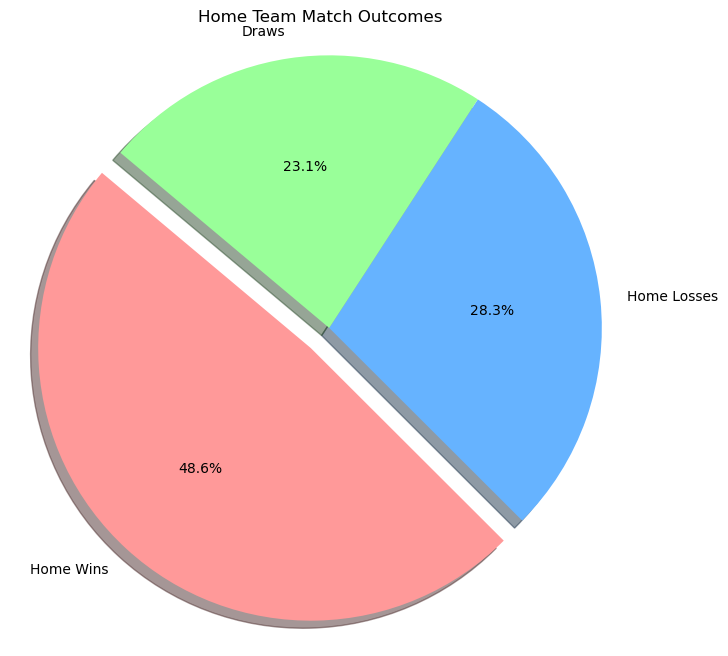

In [17]:
import matplotlib.pyplot as plt

home_wins = (df['home_score'] > df['away_score']).sum()
home_losses = (df['home_score'] < df['away_score']).sum()
draws = (df['home_score'] == df['away_score']).sum()

# Print the results
print(f'Home Wins: {home_wins}')
print(f'Home Losses: {home_losses}')
print(f'Draws: {draws}')

# Data for pie chart
labels = ['Home Wins', 'Home Losses', 'Draws']
sizes = [home_wins, home_losses, draws]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # explode 1st slice

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Home Team Match Outcomes")
plt.axis('equal')  
plt.show()


In [18]:
len(df.home_team.unique())

308

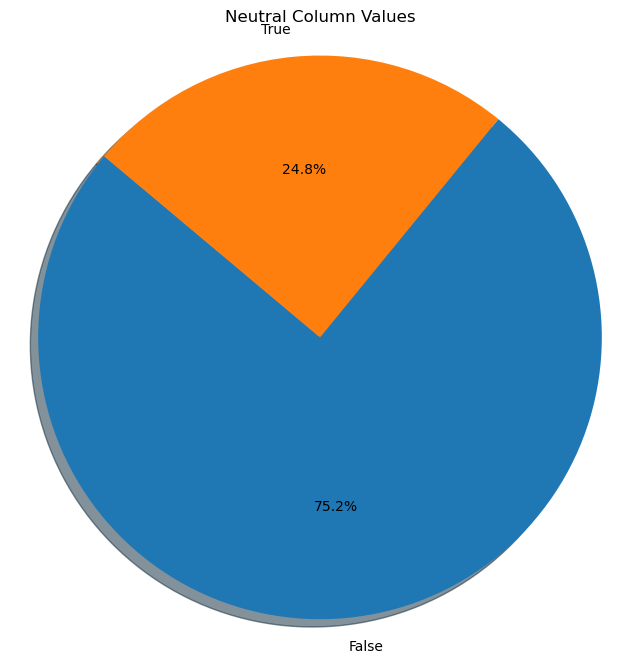

In [20]:
neutral_counts = df['neutral'].value_counts()

# Data for pie chart
labels = neutral_counts.index
sizes = neutral_counts.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Neutral Column Values')
plt.axis('equal') 
plt.show()